In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('//content/AirPassengers.csv')

In [ ]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [ ]:
df.shape

(144, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['date']=pd.to_datetime(df['date'])

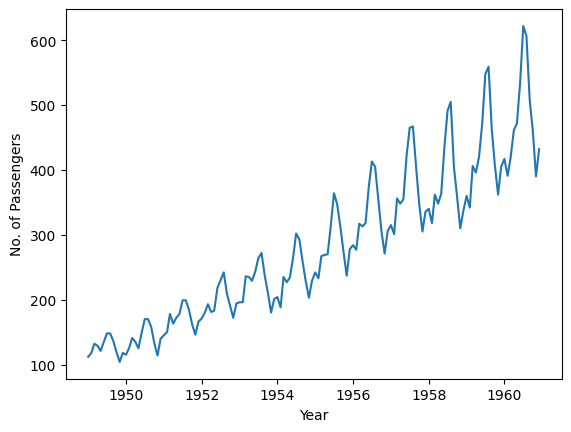

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.plot(df['date'], df['value'])
plt.xlabel("Year")
plt.ylabel("No. of Passengers")
plt.show()


In [ ]:
df=df.set_index('date',inplace=False)

In [ ]:
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


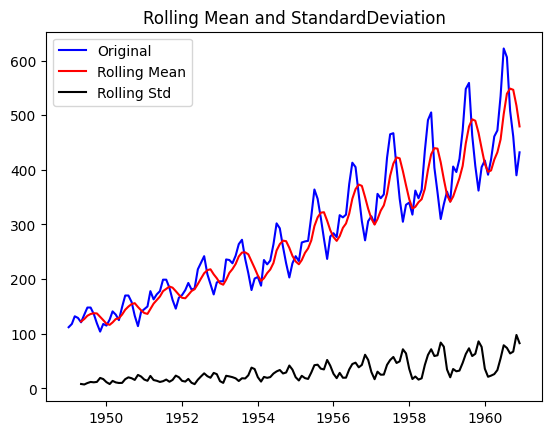

In [ ]:
movingAverage=df.rolling(window=5).mean()
movingSTD=df.rolling(window=5).std()
plt.plot(df,color='blue',label='Original')
plt.plot(movingAverage,color='red',label='Rolling Mean')
plt.plot(movingSTD,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and StandardDeviation')
plt.show()

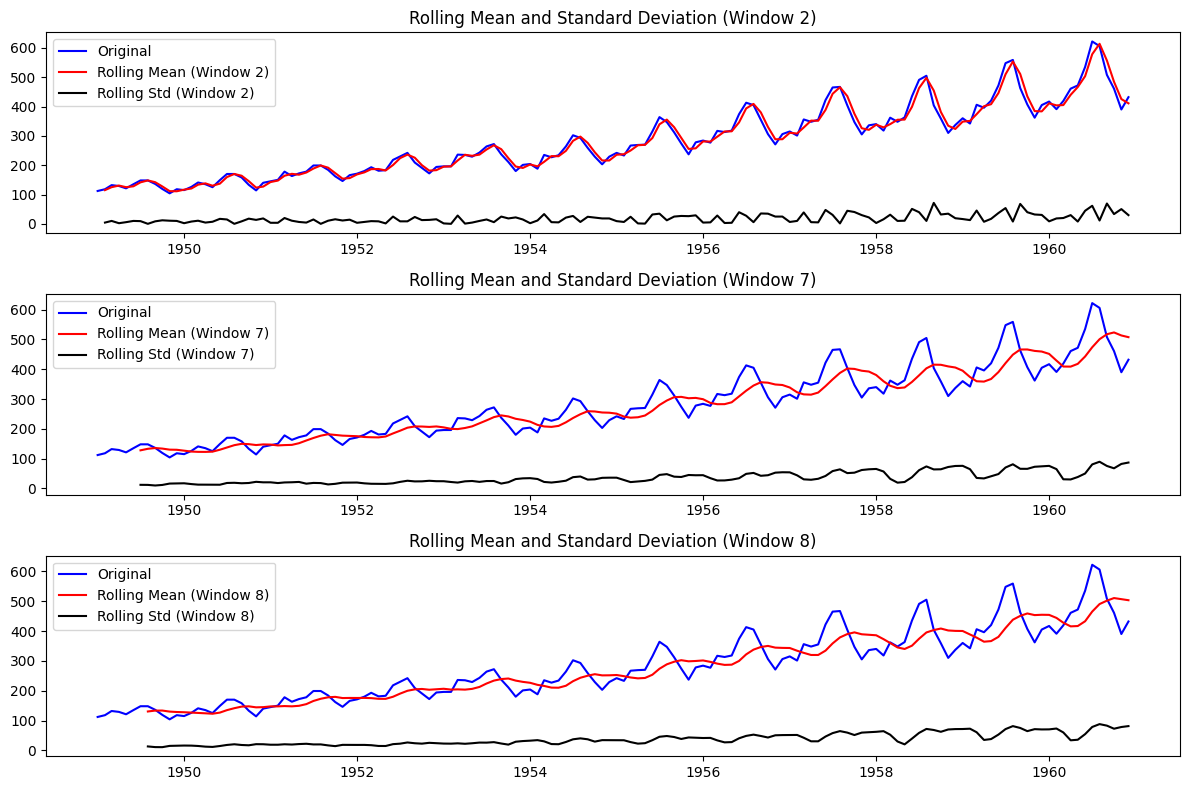

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 8))

window_sizes = [2,7,8]

for i, window_size in enumerate(window_sizes):
    movingAverage = df.rolling(window=window_size).mean()
    movingSTD = df.rolling(window=window_size).std()

    axs[i].plot(df, color='blue', label='Original')
    axs[i].plot(movingAverage, color='red', label=f'Rolling Mean (Window {window_size})')
    axs[i].plot(movingSTD, color='black', label=f'Rolling Std (Window {window_size})')

    axs[i].legend(loc='best')
    axs[i].set_title(f'Rolling Mean and Standard Deviation (Window {window_size})')

plt.tight_layout()
plt.show()


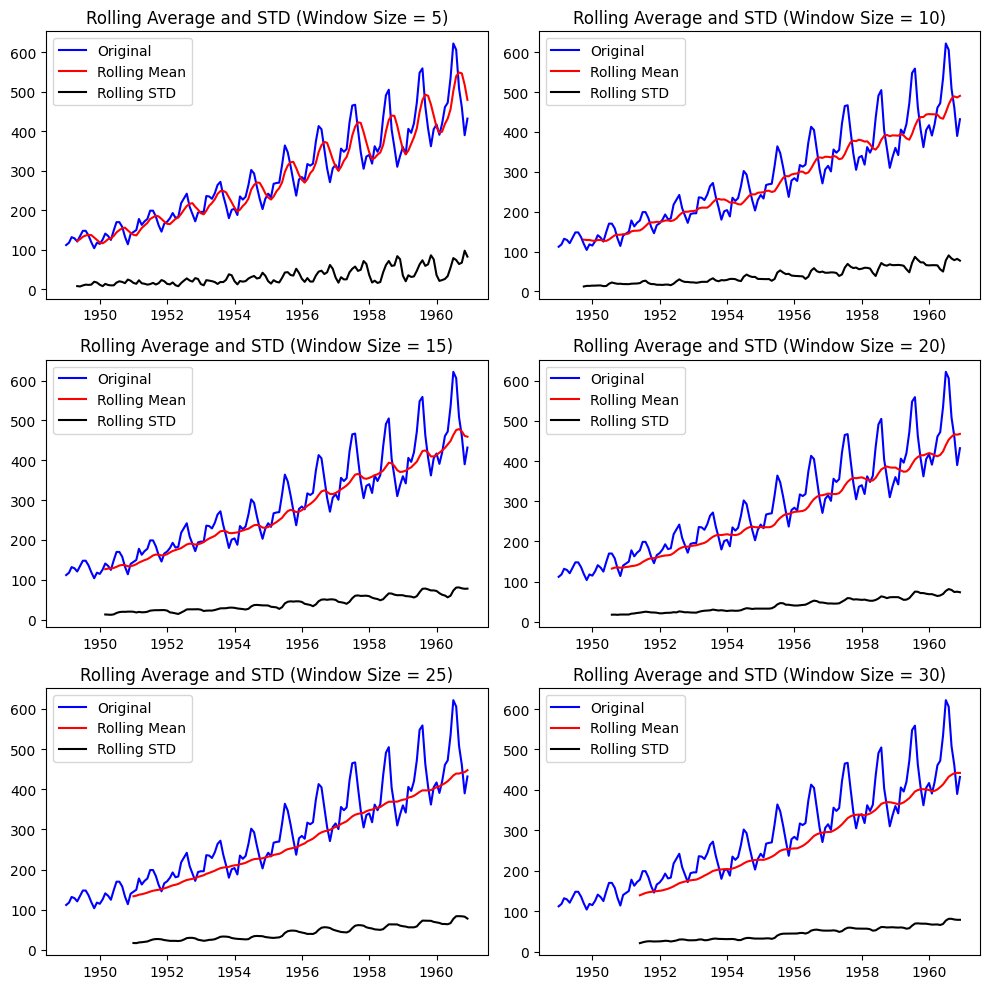

In [ ]:
# Define window sizes
window_sizes = [5, 10, 15, 20, 25, 30]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

# Plot each subplot
for ax, window in zip(axes.flatten(), window_sizes):
    movingAverage = df.rolling(window=window).mean()
    movingSTD = df.rolling(window=window).std()

    ax.plot(df, color='blue', label='Original')
    ax.plot(movingAverage, color='red', label='Rolling Mean')
    ax.plot(movingSTD, color='black', label='Rolling STD')
    ax.legend(loc='best')
    ax.set_title(f"Rolling Average and STD (Window Size = {window})")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

**ADF Test**

test statistic < Critical value , p value - <0.05, reject null hypothesis , it is stationary data

test statistic > Critical value, p value - >0.05, accept null hypothesis , it is nonstationary data

> Add blockquote



In [ ]:
def adf_test(timeseries):
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)




In [ ]:
#call function and run the test
adf_test(df['value'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Hyposesis is False as because the data is nonstationary

In [ ]:
# KPSS Test-
#test statistic < Critical value , p value - <0.05, failed to reject null hypothesis , it is stationary data

#test statistic > Critical value, p value - >0.05, accept null hypothesis , it is nonstationary data



In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
  print('Results of KPSS Test:')
  kpsstest = kpss(timeseries,regression='c', nlags="auto")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)

In [ ]:
#call function and run the test

kpss_test(df['value'])

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-22-b18063fa5719>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries,regression='c', nlags="auto")


Data is nonstationary as we failed to reject the  null hypothesis

<Axes: xlabel='date'>

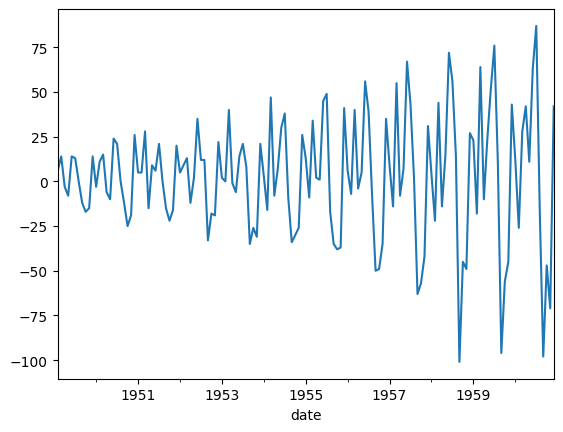

In [ ]:
#making a timeseries stationary


df['value_diff']=df['value']-df['value'].shift(1)
df['value_diff'].dropna().plot()

**Seasonal Differencing**


<Axes: xlabel='date'>

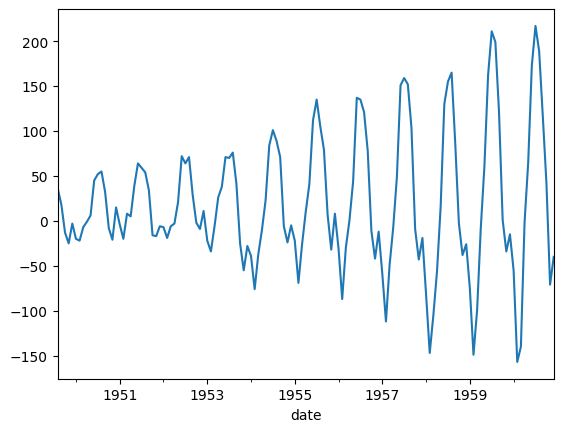

In [ ]:
n=7
df['Seasonal_diff']=df['value']-df['value'].shift(n)
df['Seasonal_diff'].dropna().plot()

**Transformation** : Includes power transform, square root,and log transform

In [ ]:

# Assuming df['value'] is your pandas Series
df['log_t'] = np.log(df['value'])
df['log_t']

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: log_t, Length: 144, dtype: float64

<Axes: xlabel='date'>

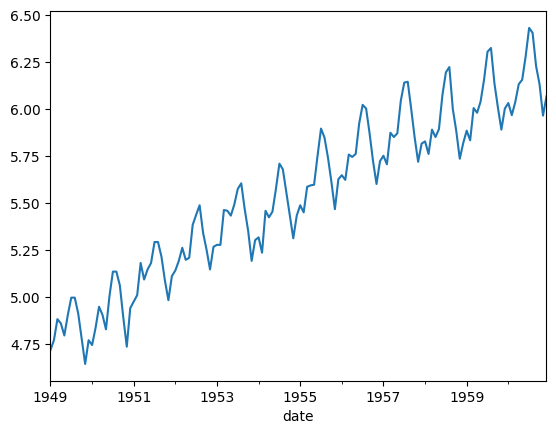

In [ ]:
df['log_value']=np.log(df['value'])
df['log_value'].plot()

<Axes: xlabel='date'>

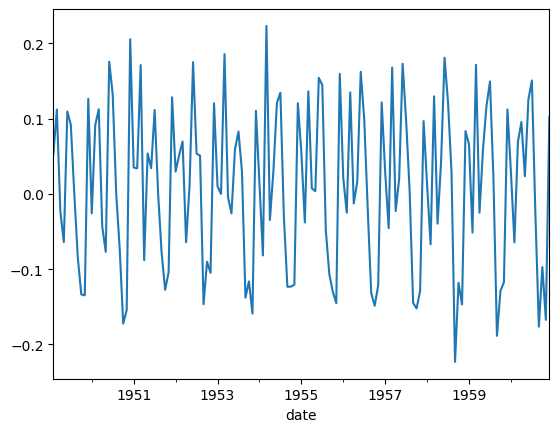

In [ ]:
df['log_value_diff']=df['log_value']-df['log_value'].shift(1)
df['log_value_diff'].dropna().plot()

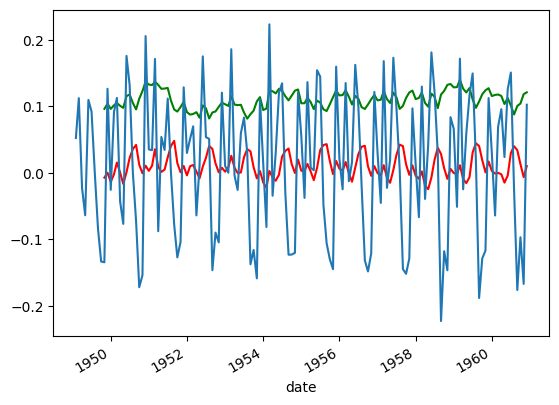

In [ ]:
movingAverage = df['log_value_diff'].rolling(window=10).mean()
movingSTD = df['log_value_diff'].rolling(window=10).std()
plt.plot(movingAverage,color='red',label='movingAverage')
plt.plot(movingSTD,color='green',label='movingSTD')
df['log_value_diff'].dropna().plot()
plt.show()

In [ ]:
adf_test(df['log_value'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
kpss_test(df['log_value'])

Results of KPSS Test:
Test Statistic           1.668651
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-22-b18063fa5719>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries,regression='c', nlags="auto")


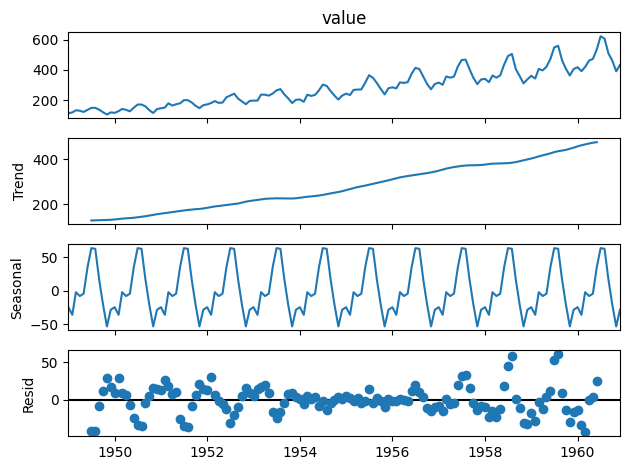

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['value'],model='addictive')
# model = 'addictive'
decomposition.plot()
plt.show()

In [ ]:
print(decomposition.seasonal, decomposition.trend)

date
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64 date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

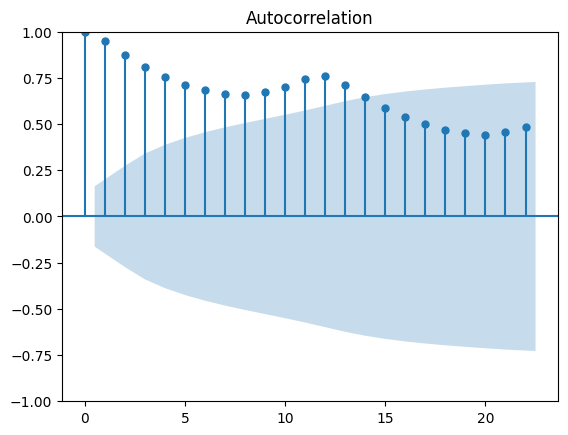

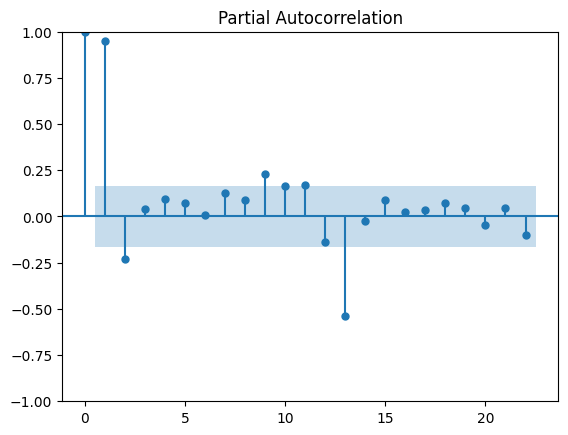

In [ ]:
plot_acf(df['value'])
plt.show()

plot_pacf(df['value'])
plt.show()


